In [6]:
def g2(nx, ny, s):
    
    eqg = lambda x, y, s: np.exp(-0.5*(x**2 + y**2)/s**2)
    
    nrx = int(np.floor(nx/2))
    nry = int(np.floor(ny/2))
    
    nlx = -(nx - nrx - 1)
    nly = -(ny - nry - 1)
    
    g = np.zeros((nx, ny))
    
    for i in range(nrx):
        for j in range(nry):
            g[i, j] = eqg(i, j, s)
    
    for i in range(nlx-1, -1):
        for j in range(nly-1, -1):
            g[i + nx + 1, j + ny + 1] = eqg(i, j, s)
    
    for i in range(0, nrx):
        for j in range(nly -1 , -1):
            g[i, j + ny + 1] = eqg(i, j, s)
    
    for i in range(nlx - 1, -1):
        for j in range(nry):
            g[i + nx + 1, j] = eqg(i, j, s)
    return g    

In [7]:
img = mpimg.imread('./plt2.jpg')
im_red_gray = img[:, :, 2]

In [8]:
gs = g2(img.shape[0], img.shape[1], 0.5)
fft_gs = np.fft.fft2(gs)

In [9]:
im_fft = np.fft.fft2(im_red_gray)

In [10]:
Lx, Ly = im_fft.shape

In [11]:
kx = (2*np.pi/Lx)*np.arange(-Lx/2, Lx/2)
ky = (2*np.pi/Ly)*np.arange(-Ly/2, Ly/2)

In [12]:
kx = np.fft.fftshift(kx)
ky = np.fft.fftshift(ky)

In [13]:
dfftx = []
dffty = []

In [14]:
for i in range(Ly):
    dfftx.append(kx*im_fft[:,i]*fft_gs[:,i]*(1j))

for i in range(Lx):
    dffty.append(ky*im_fft[i,:]*fft_gs[i,:]*(1j))    

In [15]:
dfftx = np.array(dfftx)
dffty = np.array(dffty)

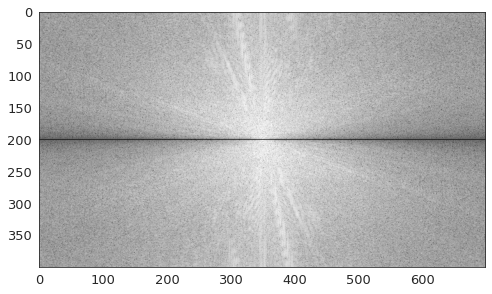

In [16]:
fig = plt.figure(figsize = (8,8))
plt.imshow(np.log(1+np.absolute(np.fft.fftshift(dfftx).T)), cmap ='gray')

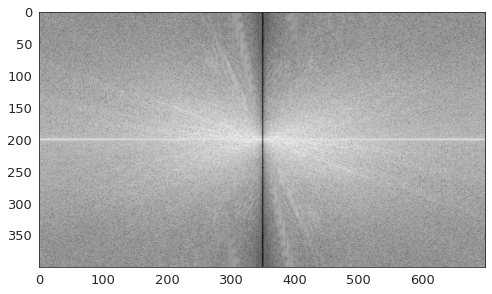

In [204]:
fig = plt.figure(figsize = (8,8))
plt.imshow(np.log(1+np.absolute(np.fft.fftshift(dffty))), cmap ='gray')

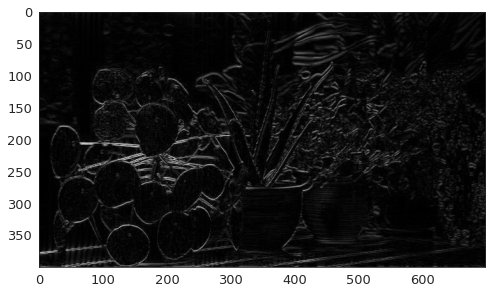

In [206]:
fig = plt.figure(figsize = (8,8))
plt.imshow(np.absolute(np.fft.ifft2(dfftx).T), cmap ='gray')

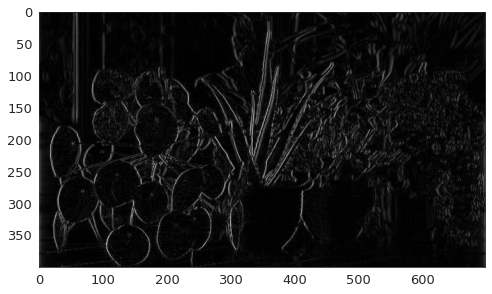

In [19]:
fig = plt.figure(figsize = (8,8))
plt.imshow(np.absolute(np.fft.ifft2(dffty)), cmap ='gray')

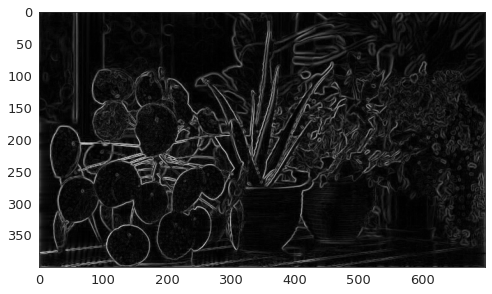

In [20]:
fig = plt.figure(figsize = (8,8))
plt.imshow(np.real(np.sqrt(np.fft.ifft2(dffty)**2+np.fft.ifft2(dfftx).T**2)), cmap ='gray')

# Canny Edge Detection

In [21]:
imx = np.real(np.fft.ifft2(dfftx.T))
imy = np.real(np.fft.ifft2(dffty))

mag = np.sqrt(imx**2+imy**2)

In [22]:
edg = np.zeros(im_red_gray.shape)

In [23]:
for i in range(1, edg.shape[0] - 1):
    for j in range(1, edg.shape[1] - 1):
        
        m = imy[i][j]/imx[i][j]
        
        if np.absolute(m) < 1:
            
            j1 = int(np.round(j - m))
            j2 = int(np.round(j + m))
            
            i1 = i - 1
            i2 = i + 1
            
        else:
            
            i1 = int(np.round(i - 1/m))
            i2 = int(np.round(i + 1/m))
            
            j1 = j - 1
            j2 = j + 1
        
        if mag[i1][j1] < mag[i][j] and mag[i2][j2] < mag[i][j]:
            
            edg[i][j] = mag[i][j] 
    

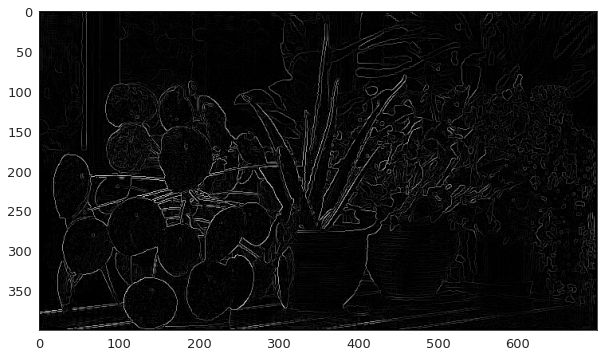

In [24]:
fig = plt.figure(figsize = (10,10))
plt.imshow(edg, cmap ='gray')

In [25]:
T1 = 70
T2 = 35

In [26]:
edg1 = np.where(edg > T1, 255, 0)
edg2 = np.where(edg < T1, edg, 0)
edg2 = np.where(edg2 > T2, 255, 0)

In [27]:
edgimg = np.array([[[0, 0, 0]]*edg.shape[1]]*edg.shape[0])

for i in range(edg.shape[0]):
    for j in range(edg.shape[1]):
        
        if edg1[i, j] != 0:
            edgimg[i, j] = [255, 0, 0]
        elif edg2[i, j] != 0:
            edgimg[i, j] = [0, 0, 255]        

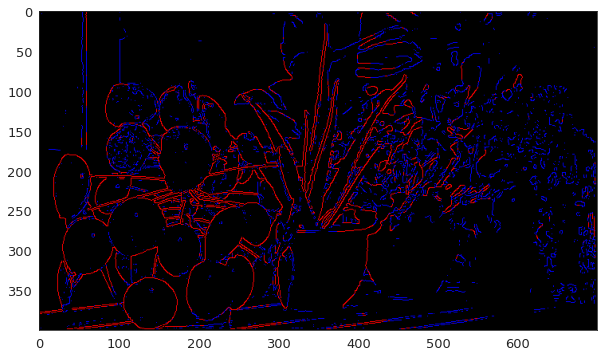

In [28]:
fig = plt.figure(figsize = (10,10))
plt.imshow(edgimg, cmap ='gray')

In [29]:
x, y = [], []

for i in range(edg1.shape[0]):
    for j in range(edg1.shape[1]):
        if edg1[i, j] != 0:
            x.append(i)
            y.append(j)

In [30]:
can = edg1
curr_x, curr_y = x, y

In [31]:
while(len(curr_x) > 0):
    
    next_x, next_y = [], []
    
    for k in range(len(curr_x)):
        for ii in range(-1, 2):
            for jj in range(-1, 2):
                if edg2[curr_x[k] + ii][curr_y[k] + jj] != 0:
                    
                    next_x.append(curr_x[k] + ii)
                    next_y.append(curr_y[k] + jj)
                    
                    can[curr_x[k] + ii][curr_y[k] + jj] = 255
                    edg2[curr_x[k] + ii][curr_y[k] + jj] = 0
    
    curr_x = next_x
    curr_y = next_y

In [32]:
n_img = np.array([[[0, 0, 0]]*edg.shape[1]]*edg.shape[0])

for i in range(can.shape[0]):
    for j in range(can.shape[1]):
        
        if can[i, j] == 255:
            n_img[i, j] = [0, 0, 255] 
        else:
            n_img[i, j] = img[i, j]

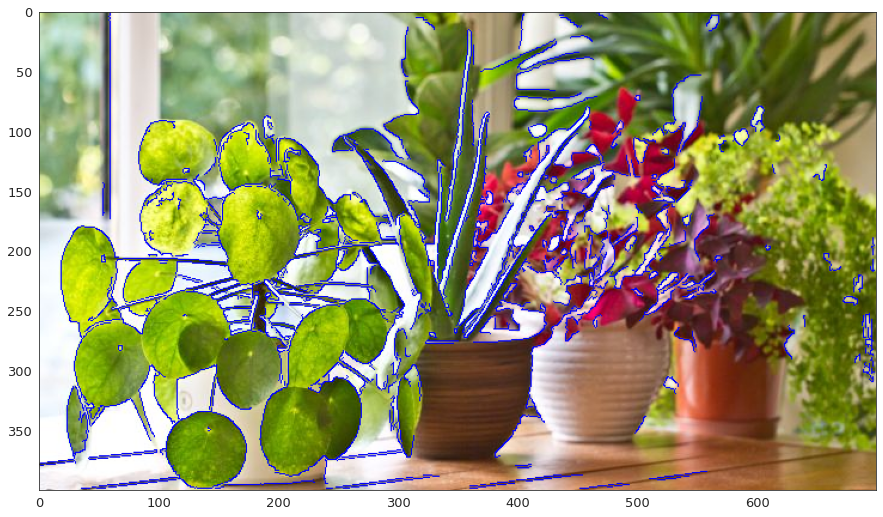

In [33]:
fig = plt.figure(figsize = (15,15))
plt.imshow(n_img)

# Laplacian of Gauss

In [209]:
img = mpimg.imread('./keaton.jpg')
im_red_gray = img[:, :, 2]

In [210]:
gs = g2(img.shape[0], img.shape[1], 0.001)
fft_gs = np.fft.fft2(gs)

In [211]:
im_fft = np.fft.fft2(im_red_gray)

In [212]:
Lx, Ly = im_fft.shape

In [213]:
kx = (2*np.pi/Lx)*np.arange(-Lx/2, Lx/2)
ky = (2*np.pi/Ly)*np.arange(-Ly/2, Ly/2)

In [214]:
kx = np.fft.fftshift(kx)
ky = np.fft.fftshift(ky)

In [215]:
LoG = [[0]*Ly]*Lx

In [216]:
np.array(LoG)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [224]:
for u in range(Lx):
    for v in range(Ly):        
        LoG[u][v] = im_fft[u][v]*fft_gs[u][v]*(-kx[u]**2 - ky[v]**2)*4*np.pi**2

In [225]:
LoGimg = np.absolute(np.fft.ifft2(np.array(LoG)))

In [219]:
LoGimg

array([[-47599.48236767,  13362.9518633 ,  -7672.86627158, ...,
          3270.78989616, -11273.53098685,  47421.58789849],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       ...,
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ]])

In [220]:
def Zero_crossing(image):
    z_c_image = np.zeros(image.shape)
    
    # For each pixel, count the number of positive
    # and negative pixels in the neighborhood
    
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            negative_count = 0
            positive_count = 0
            neighbour = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],image[i, j-1],image[i, j+1],image[i-1, j-1],image[i-1, j],image[i-1, j+1]]
            d = max(neighbour)
            e = min(neighbour)
            for h in neighbour:
                if h>0:
                    positive_count += 1
                elif h<0:
                    negative_count += 1
 
 
            # If both negative and positive values exist in 
            # the pixel neighborhood, then that pixel is a 
            # potential zero crossing
            
            z_c = ((negative_count > 0) and (positive_count > 0))
            
            # Change the pixel value with the maximum neighborhood
            # difference with the pixel
 
            if z_c:
                if image[i,j]>0:
                    z_c_image[i, j] = image[i,j] + np.abs(e)
                elif image[i,j]<0:
                    z_c_image[i, j] = np.abs(image[i,j]) + d
                
    # Normalize and change datatype to 'uint8' (optional)
    z_c_norm = z_c_image/z_c_image.max()*255
    z_c_image = np.uint8(z_c_norm)
 
    return z_c_image

In [222]:
cross = Zero_crossing(LoGimg)

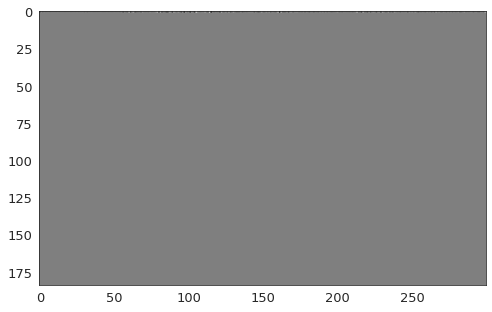

In [223]:
fig = plt.figure(figsize = (8, 8))
plt.imshow(LoGimg, cmap = 'gray')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib import cm
from scipy import signal
from scipy import misc
from scipy import sparse
import seaborn as sns
from scipy import signal

<hr></hr>

### **6. Globally Setting**

<hr></hr>

In [2]:
%matplotlib inline

In [3]:
sns.set_style('white') # darkgrid, white grid, dark, white and ticks

In [4]:
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [5]:
sns.color_palette("husl", 20) # color palette exemple

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9579148533500138, 0.358831186992106, 0.9474115985773391),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9651791951613143, 0.4212549802305815, 0.6785112441648762)]